In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train=pd.read_csv(r'C:\Users\naveen chauhan\Desktop\mldata\make_my_trip\dataset\train.csv')
train.head()

,id,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P
0,1,b,18.42,10.415,y,p,aa,v,0.125,t,f,0,f,g,120.0,375,1
1,2,a,21.75,11.750,u,g,c,v,0.250,f,f,0,t,g,180.0,0,1
2,3,b,30.17,1.085,y,p,c,v,0.040,f,f,0,f,g,170.0,179,1
3,4,b,22.67,2.540,y,p,c,h,2.585,t,f,0,f,g,0.0,0,0
4,5,a,36.00,1.000,u,g,c,v,2.000,t,t,11,f,g,0.0,456,0


In [3]:
test=pd.read_csv(r'C:\Users\naveen chauhan\Desktop\mldata\make_my_trip\dataset\test.csv')

In [4]:
test.head()

,id,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O
0,553,b,29.17,3.500,u,g,w,v,3.500,t,t,3,t,g,329.0,0
1,554,b,28.33,5.000,u,g,w,v,11.000,t,f,0,t,g,70.0,0
2,555,b,29.25,14.790,u,g,aa,v,5.040,t,t,5,t,g,168.0,0
3,556,a,44.17,6.665,u,g,q,v,7.375,t,t,3,t,g,0.0,0
4,557,b,18.08,5.500,u,g,k,v,0.500,t,f,0,f,g,80.0,0


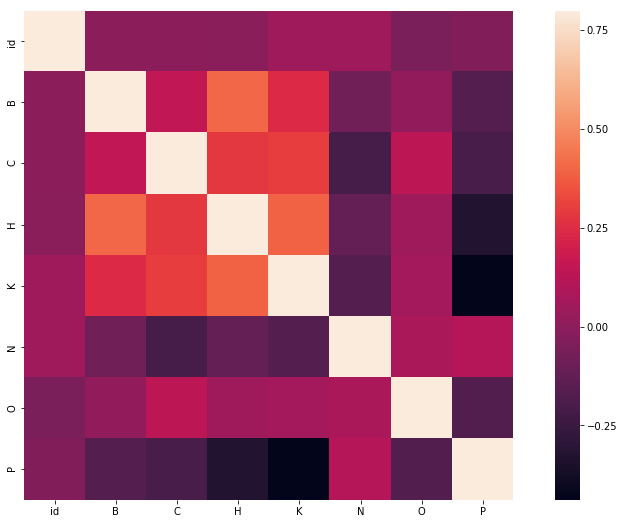

In [5]:
ax=plt.subplots(figsize=(15,9))
correlation=train.corr()
sns.heatmap(correlation,vmax=0.8,square=True)

In [6]:
output_value=train.P

In [7]:
train.isnull().sum()

id     0
A      8
B      9
C      0
D      5
E      5
F      7
G      7
H      0
I      0
J      0
K      0
L      0
M      0
N     11
O      0
P      0
dtype: int64

In [8]:
train.shape

(552, 17)

In [9]:
#now do in binary
train.A.value_counts()

b    374
a    170
Name: A, dtype: int64

In [10]:
#drop rows with less number of value
train.D.value_counts()

u    416
y    129
l      2
Name: D, dtype: int64

In [11]:
train.E.value_counts()

g     416
p     129
gg      2
Name: E, dtype: int64

In [12]:
train.F.value_counts()

c     115
q      66
w      50
i      47
ff     43
aa     42
k      40
m      31
x      31
cc     29
d      24
e      18
j       8
r       1
Name: F, dtype: int64

In [13]:
train.G.value_counts()

v     319
h     113
bb     47
ff     46
z       7
j       6
dd      3
n       2
o       2
Name: G, dtype: int64

In [14]:
train.I.value_counts()

t    286
f    266
Name: I, dtype: int64

In [15]:
train.J.value_counts()

f    319
t    233
Name: J, dtype: int64

In [16]:
train.L.value_counts()

f    298
t    254
Name: L, dtype: int64

In [17]:
train.M.value_counts()

g    497
s     48
p      7
Name: M, dtype: int64

In [18]:
train.loc[train.D=='l',]

,id,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P
126,127,a,18.08,0.375,l,gg,cc,ff,10.0,f,f,0,t,s,300.0,0,0
128,129,b,17.50,22.000,l,gg,ff,o,0.0,f,f,0,t,p,450.0,100000,0


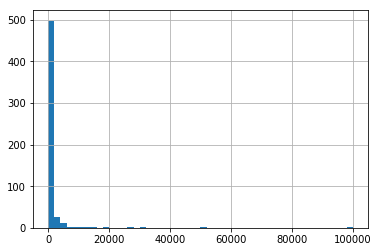

In [19]:
train.O.hist(bins=50)

In [20]:
#delete that rows 
len(train.loc[train.O>10000,])

11

In [21]:
data=train.append(test)

In [22]:
data.shape

(690, 17)

In [23]:
data.D.value_counts()

u    519
y    163
l      2
Name: D, dtype: int64

In [24]:
data.E.value_counts()

g     519
p     163
gg      2
Name: E, dtype: int64

In [25]:
data.D=data.D.map({'u':0,'y':1,'l':2})
data.E=data.E.map({'g':0,'p':1,'gg':2})

In [26]:
data.D.value_counts()

0.0    519
1.0    163
2.0      2
Name: D, dtype: int64

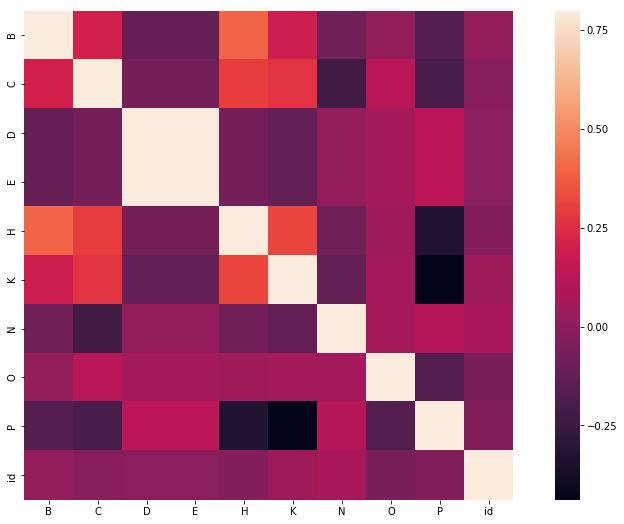

In [27]:
ax=plt.subplots(figsize=(15,9))
correl=data.corr()
sns.heatmap(correl,vmax=.8,square=True)

In [28]:
#now drop the column D or E
data.drop('D',inplace=True,axis=1)

In [29]:
data.shape

(690, 16)

In [30]:
data.A=data.A.map({'a':1,'b':0})

In [31]:
data.I=data.I.map({'f':1,'t':0})
data.J=data.J.map({'f':1,'t':0})
data.L=data.L.map({'f':1,'t':0})

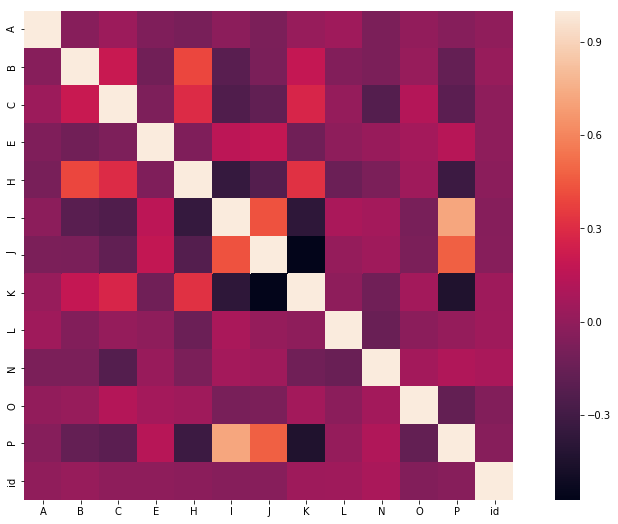

In [32]:
ax=plt.subplots(figsize=(15,9))
correl=data.corr()
sns.heatmap(correl,vmax=1,square=True)

In [33]:
data.P.value_counts()

1.0    305
0.0    247
Name: P, dtype: int64

In [34]:
data.I.value_counts()

0    361
1    329
Name: I, dtype: int64

C:\Users\naveen chauhan\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """


Text(0,0.5,'P')

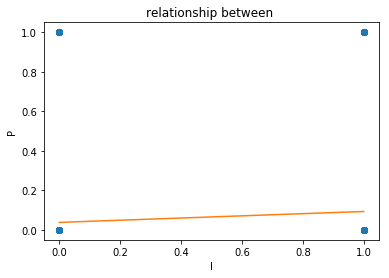

In [35]:
plt.subplot(1,1,1)
x=data['I']
y=data['P']
plt.plot(x,y,'o')
plt.plot(np.unique(x),np.poly1d(np.polyfit(x,y,1))(np.unique(x)))
plt.title('relationship between ')
plt.xlabel('I')
plt.ylabel('P')

In [36]:
data.head()

,A,B,C,E,F,G,H,I,J,K,L,M,N,O,P,id
0,0.0,18.42,10.415,1.0,aa,v,0.125,0,1,0,1,g,120.0,375,1.0,1
1,1.0,21.75,11.750,0.0,c,v,0.250,1,1,0,0,g,180.0,0,1.0,2
2,0.0,30.17,1.085,1.0,c,v,0.040,1,1,0,1,g,170.0,179,1.0,3
3,0.0,22.67,2.540,1.0,c,h,2.585,0,1,0,1,g,0.0,0,0.0,4
4,1.0,36.00,1.000,0.0,c,v,2.000,0,0,11,1,g,0.0,456,0.0,5


In [37]:
data.isnull().sum()

A      12
B      12
C       0
E       6
F       9
G       9
H       0
I       0
J       0
K       0
L       0
M       0
N      13
O       0
P     138
id      0
dtype: int64

In [38]:
train.isnull().sum()

id     0
A      8
B      9
C      0
D      5
E      5
F      7
G      7
H      0
I      0
J      0
K      0
L      0
M      0
N     11
O      0
P      0
dtype: int64

In [39]:
data.A.value_counts()

0.0    468
1.0    210
Name: A, dtype: int64

In [40]:
data.A.fillna(1.0,inplace=True)

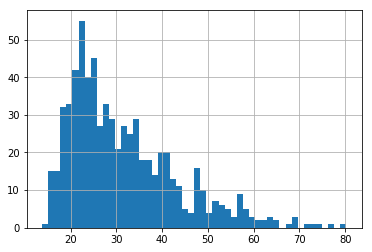

In [41]:
data.B.hist(bins=50)

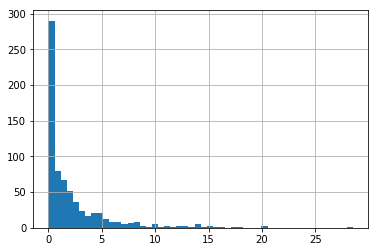

In [42]:
data.H.hist(bins=50)

In [43]:
data.H.loc[data.H>17,]

44     20.0
104    17.5
306    18.0
368    28.5
375    20.0
Name: H, dtype: float64

In [44]:
len(data.B.loc[data.B>70,])

5

In [45]:
B_mean=data.pivot_table(values='B', index='H')


In [46]:
mean_value=data.groupby("H").B.mean()

In [47]:
miss_bool = data['B'].isnull() 
data.loc[miss_bool,'B'] = data.loc[miss_bool,'H'].apply(lambda x: mean_value[x])

In [48]:
data.isnull().sum()

A       0
B       0
C       0
E       6
F       9
G       9
H       0
I       0
J       0
K       0
L       0
M       0
N      13
O       0
P     138
id      0
dtype: int64

In [49]:
data.tail()

,A,B,C,E,F,G,H,I,J,K,L,M,N,O,P,id
133,0.0,26.33,13.000,0.0,e,dd,0.00,1,1,0,0,g,140.0,1110,NaN,686
134,0.0,21.08,4.125,1.0,i,h,0.04,1,1,0,1,g,140.0,100,NaN,687
135,0.0,39.25,9.500,0.0,m,v,6.50,0,0,14,1,g,240.0,4607,NaN,688
136,0.0,41.92,0.420,0.0,c,h,0.21,0,0,6,1,g,220.0,948,NaN,689
137,1.0,20.50,11.835,0.0,c,h,6.00,0,1,0,1,g,340.0,0,NaN,690


In [50]:
data.F.value_counts()

c     137
q      78
w      64
i      59
aa     54
ff     53
k      51
cc     41
x      38
m      38
d      30
e      25
j      10
r       3
Name: F, dtype: int64

In [51]:
data.G.value_counts()

v     399
h     138
bb     59
ff     57
z       8
j       8
dd      6
n       4
o       2
Name: G, dtype: int64

In [52]:
data.drop('G',inplace=True,axis=1)

In [53]:
data.F=data.F.map({'c':14,'q':1,'w':2,'i':3,'aa':4,'ff':5,'k':6,'cc':7,'x':8,'m':9,'d':10,'e':11,'j':12,'r':13})

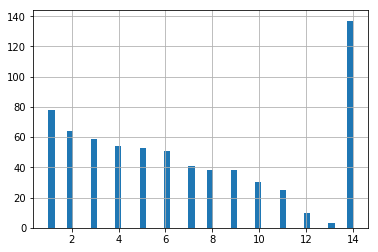

In [54]:
data.F.hist(bins=50)

In [55]:
data.F.isnull().sum()

9

In [56]:
data.head()

,A,B,C,E,F,H,I,J,K,L,M,N,O,P,id
0,0.0,18.42,10.415,1.0,4.0,0.125,0,1,0,1,g,120.0,375,1.0,1
1,1.0,21.75,11.750,0.0,14.0,0.250,1,1,0,0,g,180.0,0,1.0,2
2,0.0,30.17,1.085,1.0,14.0,0.040,1,1,0,1,g,170.0,179,1.0,3
3,0.0,22.67,2.540,1.0,14.0,2.585,0,1,0,1,g,0.0,0,0.0,4
4,1.0,36.00,1.000,0.0,14.0,2.000,0,0,11,1,g,0.0,456,0.0,5


In [57]:
data.M.value_counts()

g    625
s     57
p      8
Name: M, dtype: int64

In [58]:
data.M=data.M.map({'g':0,'s':1,'p':2})

In [59]:
data.isnull().sum()

A       0
B       0
C       0
E       6
F       9
H       0
I       0
J       0
K       0
L       0
M       0
N      13
O       0
P     138
id      0
dtype: int64

In [60]:
print(data.E.value_counts())
print(data.F.value_counts())

0.0    519
1.0    163
2.0      2
Name: E, dtype: int64
14.0    137
1.0      78
2.0      64
3.0      59
4.0      54
5.0      53
6.0      51
7.0      41
8.0      38
9.0      38
10.0     30
11.0     25
12.0     10
13.0      3
Name: F, dtype: int64


In [61]:
data.E.fillna(0,inplace=True)

In [62]:
data.F.values

array([  4.,  14.,  14.,  14.,  14.,   5.,  10.,  10.,   9.,  14.,   4.,
         4.,  12.,   9.,  14.,  14.,   4.,   3.,   6.,   4.,  14.,   3.,
        12.,  14.,   7.,  14.,   8.,   2.,   4.,   2.,   3.,   4.,  11.,
        14.,   1.,   2.,  14.,   2.,  14.,   3.,  14.,   3.,   1.,   3.,
        11.,  14.,   1.,  10.,   1.,   9.,   6.,   7.,  14.,   2.,   9.,
        12.,   8.,   9.,   1.,  14.,   4.,   2.,   5.,   9.,   7.,   1.,
         3.,   1.,   7.,  14.,   4.,   2.,  14.,   8.,   9.,  10.,   1.,
         7.,  14.,   3.,   4.,  14.,   5.,   1.,   7.,   5.,   5.,   7.,
         8.,  14.,  nan,   4.,   4.,   7.,   5.,   2.,   6.,   8.,   1.,
         4.,   3.,  14.,   6.,  11.,   8.,   8.,   6.,   7.,   5.,   4.,
        14.,   6.,  11.,   3.,   3.,   2.,  11.,   4.,   4.,   3.,   1.,
         4.,   6.,  14.,   4.,   4.,   7.,   1.,   5.,   8.,   2.,  14.,
        nan,   4.,   2.,  14.,   1.,  14.,   3.,   1.,   7.,  14.,  14.,
         2.,   4.,   6.,   3.,   9.,  14.,   2.,   

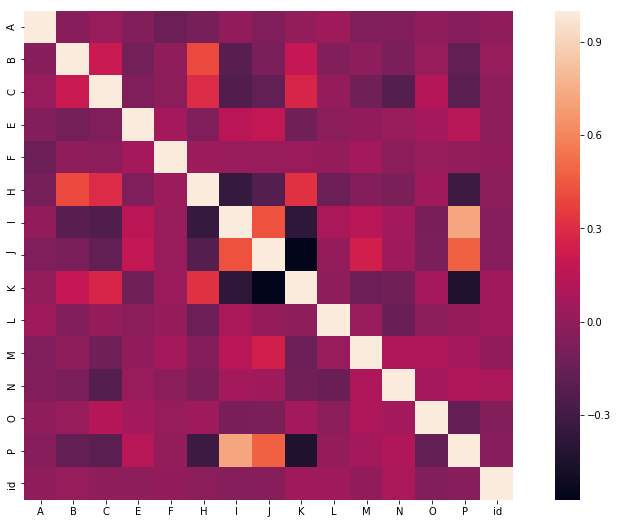

In [63]:
ax=plt.subplots(figsize=(15,9))
correl=data.corr()
sns.heatmap(correl,vmax=1,square=True)

In [64]:
data.isnull().sum()

A       0
B       0
C       0
E       0
F       9
H       0
I       0
J       0
K       0
L       0
M       0
N      13
O       0
P     138
id      0
dtype: int64

In [65]:
new_data=data.loc[:,['H','I','J','K','P']]

In [66]:
new_data.head()

,H,I,J,K,P
0,0.125,0,1,0,1.0
1,0.250,1,1,0,1.0
2,0.040,1,1,0,1.0
3,2.585,0,1,0,0.0
4,2.000,0,0,11,0.0


In [67]:
new_data.shape

(690, 5)

In [68]:
new_data.isnull().sum()

H      0
I      0
J      0
K      0
P    138
dtype: int64

In [69]:
#now split in train and test set
new_train=new_data.iloc[0:552,:]

In [70]:
new_train.tail()

,H,I,J,K,P
547,6.00,0,0,11,0.0
548,0.75,0,0,7,0.0
549,2.25,0,1,0,0.0
550,0.04,1,0,3,1.0
551,5.50,1,1,0,1.0


In [71]:
new_test=new_data.iloc[552:,]

In [72]:
new_test.drop('P',inplace=True,axis=1)

C:\Users\naveen chauhan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [73]:
new_test.head()

,H,I,J,K
0,3.500,0,0,3
1,11.000,0,1,0
2,5.040,0,0,5
3,7.375,0,0,3
4,0.500,0,1,0


In [74]:
target=new_train.P

In [75]:
new_train.drop('P',inplace=True,axis=1)

C:\Users\naveen chauhan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [76]:
new_train.head()

,H,I,J,K
0,0.125,0,1,0
1,0.250,1,1,0
2,0.040,1,1,0
3,2.585,0,1,0
4,2.000,0,0,11


In [77]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(new_train,target,test_size=.20,random_state=42)

In [82]:
train_X.head()

,H,I,J,K
388,1.625,0,0,1
516,0.250,1,1,0
210,0.415,1,0,1
15,0.250,1,0,1
336,1.290,0,0,2


In [83]:
test_X.head()

,H,I,J,K
547,6.000,0,0,11
81,0.875,0,1,0
140,5.500,0,0,3
79,0.500,0,1,0
272,0.000,1,1,0


In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [90]:
model=[]
model.append(('log_reg',LogisticRegression()))
model.append(('svm',SVC()))
model.append(('rdc',RandomForestClassifier()))
model.append(('knn',KNeighborsClassifier()))
model.append(('dtc',DecisionTreeClassifier()))

In [91]:
for name, clf in model:
    clf.fit(train_X,train_y)
    pred=clf.predict(test_X)
    print('accuracy of ',name," ",accuracy_score(test_y,pred))

accuracy of  log_reg   0.765765765766
accuracy of  svm   0.756756756757
accuracy of  rdc   0.72972972973
accuracy of  knn   0.756756756757
accuracy of  dtc   0.720720720721
